# Datasets and variables using numpy, matplotlib and pandas

*Requirements*: 
Your jupyter notebook should run in an environment with:
- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`

## Introduction to numpy

Full documentation is available [here](https://numpy.org/) and introduction tutorials are available [here](https://numpy.org/learn/).

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by **a tuple of non-negative integers**. In NumPy dimensions are called **axes**.

### Arrays

In [5]:
import numpy as np

In [6]:
one_dimensional = np.array([1, 2, 3])
two_dimensional = np.array([[1, 2, 3], [4, 5, 6]])

Axes can be accessed by their index:

In [3]:
# Row access
print(two_dimensional[1,:])

# Column access
print(two_dimensional[:,1])

[4 5 6]
[2 5]


#### Exercise:
Write a function that returns the value at index `row_ix` for the row and `col_ix` for the column.


In [9]:
def array_indexer(input_array, row_ix, col_ix):
    """Returns the value at row_ix and col_ix for input_array.
    """
    return input_array[row_ix][col_ix]

In [10]:
print(array_indexer(two_dimensional,0,1))

2


### Masking
Masking allows to select only values from an array according to an array of booleans.

In [5]:
# Compare array values to a set value
mask = two_dimensional > 2
mask

array([[False, False,  True],
       [ True,  True,  True]])

In [6]:
# Get values of the array respecting this mask
two_dimensional[mask]

array([3, 4, 5, 6])

## Computing statistical indicators
Numpy comes with lots of functions to compute statistical indicators, either overall the values, or overcolumns and rows.

In [7]:
# Over columns
print(np.mean(two_dimensional, axis=1))

# Over rows
print(np.mean(two_dimensional, axis=0))

# Overall
print(np.mean(two_dimensional))

[2. 5.]
[2.5 3.5 4.5]
3.5


### Exercices: 
Compute the standard error and the median for each row/column of the array `two_dimensional`.

In [14]:
def array_median(input_array):
    values = []
    for i in range(len(input_array)):
        for j in range(len(input_array[i])):
            values.append(input_array[i][j])
    values.sort()
    number_of_values = len(values)
    if number_of_values % 2 == 0:
        return (values[int(number_of_values/2)]+values[int(number_of_values/2 + 1)] ) / 2 
    else :
        return values[int(number_of_values // 2 + 1)]

In [28]:
two_dimensional

array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
two_dimensional.std(axis=0) #colonne

array([1.5, 1.5, 1.5])

In [27]:
two_dimensional.std(axis=1) #ligne

array([0.81649658, 0.81649658])

In [23]:
array_median(two_dimensional)

4.5

## Plotting using matplotlib
> Add the matplotlib library to your virtual environment `pip install matplotlib`

Matplotlib is a module for generating 2D and 3D graphics. Documentation is available [here](https://matplotlib.org/api/pyplot_summary.html). A set of tutorials are available [here](https://matplotlib.org/stable/tutorials/index.html).

Matplotlib is both **complex** and **very powerful**, so it may take a while for you to learn its full power.

In [29]:
pip install matplotlib

     |████████████████████████████████| 9.4 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 56.0 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 52.4 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 104.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 51.2 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 15.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Generate a random vector for plotting
random_vector = np.random.normal(0, 10, 1000)

### Plotting an histogram

In [30]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Histogram of a random vector')

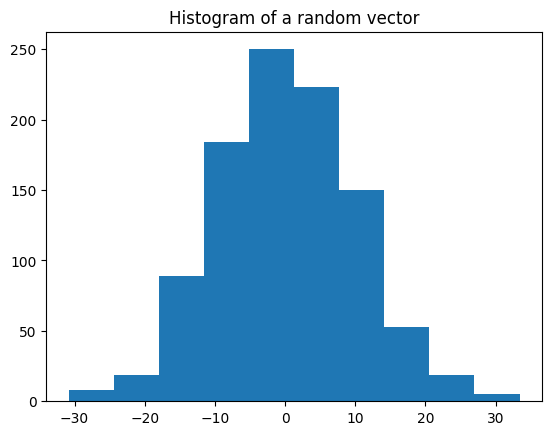

In [10]:
plt.hist(x=random_vector)
plt.title("Histogram of a random vector")

#### Exercice:
Add the labels for the x axis and the y axis on the above plot.

Text(0, 0.5, 'Occurencies')

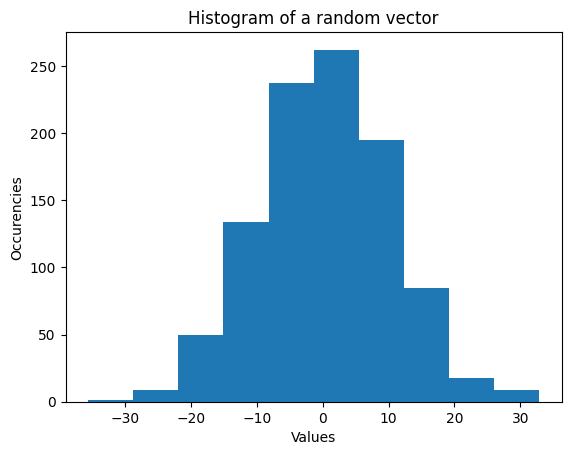

In [35]:
random_vector = np.random.normal(0, 10, 1000)
plt.hist(x=random_vector)
plt.title("Histogram of a random vector")
plt.xlabel("Values")
plt.ylabel("Occurencies")

### Plotting a boxplot

Text(0.5, 1.0, 'Boxplot of a random vector')

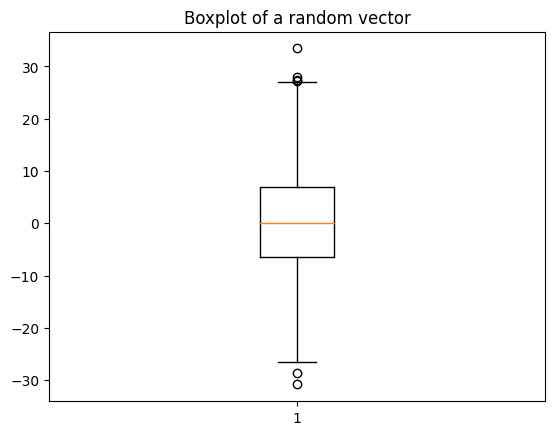

In [11]:
plt.boxplot(x=random_vector)
plt.title("Boxplot of a random vector")

#### Exercice:
Using the same data vector, plot a [violin plot] and play with the different options (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html).

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fcdec81f6a0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fcdec805910>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fcdec81fc10>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fcdec919f70>}

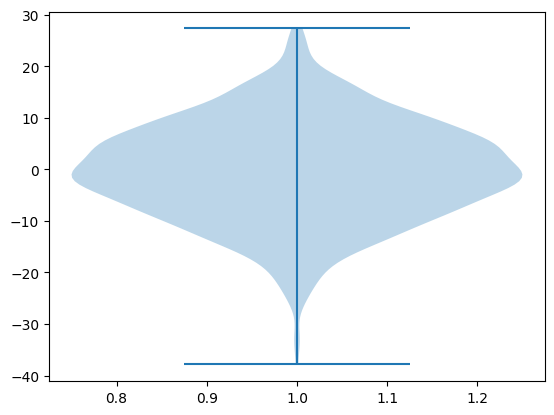

In [37]:
random_vector = np.random.normal(0, 10, 1000)
plt.violinplot(random_vector)

### Scatter plots
To plot the repartition of two numerical variables, **scatter plots** can be used.

In [42]:
random_vector_1 = np.random.normal(0, 10, 1000)
random_vector_2 = np.random.normal(0, 10, 1000)

Text(0, 0.5, 'Vector 2')

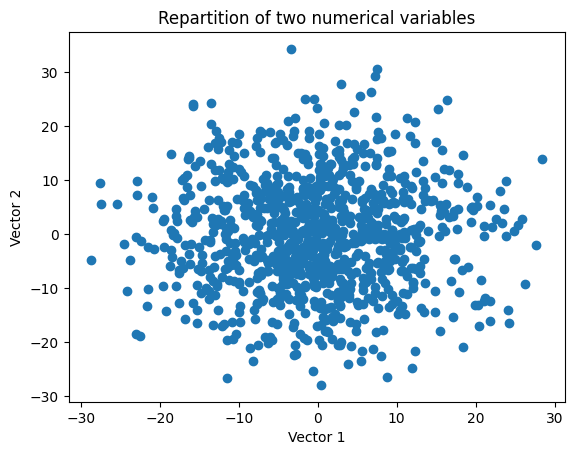

In [43]:
plt.scatter(random_vector_1, random_vector_2)
plt.title("Repartition of two numerical variables")
plt.xlabel("Vector 1")
plt.ylabel("Vector 2")

## Introduction to pandas

Pandas is a very easy to use library for data manipulation (but it can be tricky, because it's so easy to use you'll only rely on pandas afterwards even though it's **slower**).
Full documentation of pandas is [here](https://pandas.pydata.org/) and introduction is [here](https://pandas.pydata.org/docs/user_guide/10min.html).

In [38]:
pip install pandas

     |████████████████████████████████| 12.2 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 499 kB 70.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Dataframes
Dataframes (and Series, their one dimensional counterparts) is the pandas class that holds multi-dimensional data.

In [44]:
import pandas as pd

df = pd.DataFrame({"col_0": random_vector_1, "col_1": random_vector_2})

In [45]:
type(df)

pandas.core.frame.DataFrame

Dataframes can be indexed by its location or by its index.

In [46]:
# By column name
df["col_0"]
df.col_0

# By index of column
df.iloc[:,0]

0       7.976527
1      -7.756156
2       3.368266
3      -3.343338
4      17.911711
         ...    
995     1.854305
996     3.965130
997    -7.167325
998   -27.570691
999     8.264650
Name: col_0, Length: 1000, dtype: float64

The numpy array can be accessed using the `values` attribute (**it will be important for further labs and for matplotlib**).

In [47]:
df.values

array([[  7.97652651,  -7.01541498],
       [ -7.75615645,   3.10944802],
       [  3.36826558,   4.08097331],
       ...,
       [ -7.16732531,  -2.87888811],
       [-27.57069128,   9.4704908 ],
       [  8.26464967,   6.23940543]])

### Computing statistical indicators

A generic describes method is available to compute at once all the statistical estimators on a dataset.

In [48]:
df.describe()

,col_0,col_1
count,1000.000000,1000.000000
mean,-0.157397,-0.137745
std,9.797196,10.141085
min,-28.694091,-27.976458
25%,-6.387114,-6.932959
50%,0.095016,0.037571
75%,6.320305,6.410362
max,28.403638,34.237875


#### Exercice:
Compute all the estimators available using pandas `describe` method with `numpy`.

In [54]:
print("Mean : " + str(np.mean(df["col_0"])))

Mean : -0.15739660664236474


In [55]:
print("Standard error : " + str(np.std(df["col_0"])))

Standard error : 9.792295961675846


## Plotting using seaborn
[Seaborn](https://seaborn.pydata.org/) is a high-level library, built on top of `matplotlib` for easy plotting of `pandas` dataframe. It helps make beautiful plots very quickly.

In [57]:
pip install seaborn

     |████████████████████████████████| 293 kB 6.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [58]:
import seaborn as sns

### Boxplots

Text(0.5, 1.0, 'Repartition of column 0')

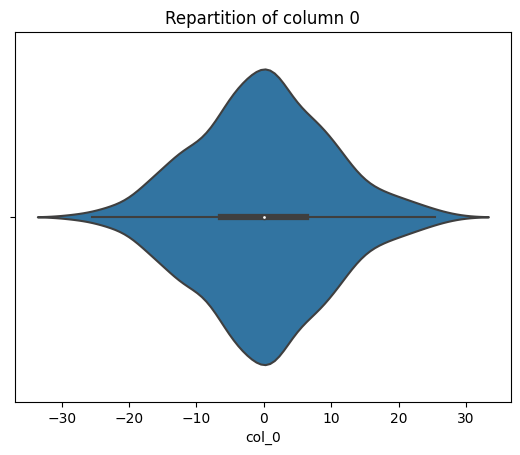

In [59]:
sns.violinplot(data=df, x="col_0").set_title("Repartition of column 0")

**Exercice**: plot the same boxplot in color red.

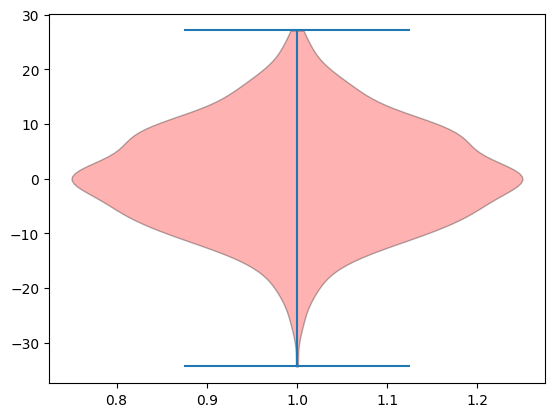

In [71]:
random_vector = np.random.normal(0, 10, 1000)
violin_parts = plt.violinplot(random_vector)
for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')

## Histograms

Text(0.5, 1.0, 'Repartition of column 0')

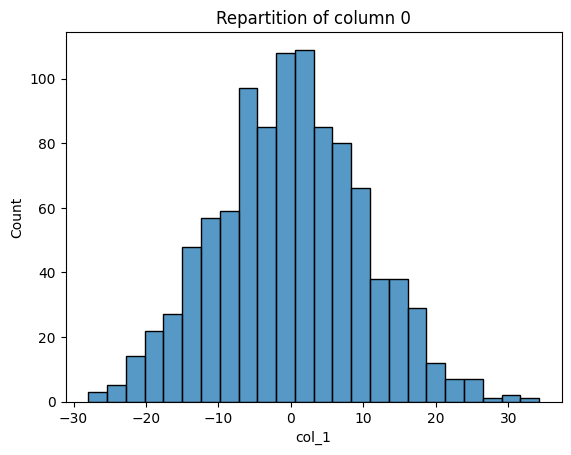

In [72]:
sns.histplot(data=df, x="col_1").set_title("Repartition of column 0")

**Exercice**: set the bin width to 10 and interprete the results.

Text(0.5, 1.0, 'Repartition of column 0')

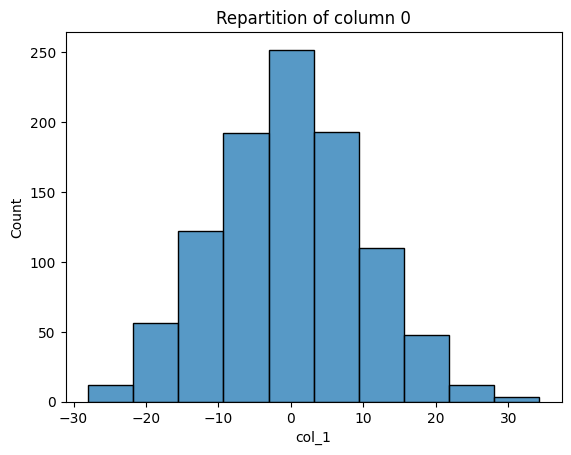

In [73]:
sns.histplot(data=df, x="col_1",bins=10).set_title("Repartition of column 0")

### Scatterplots and curve estimation

<AxesSubplot: xlabel='col_0', ylabel='col_1'>

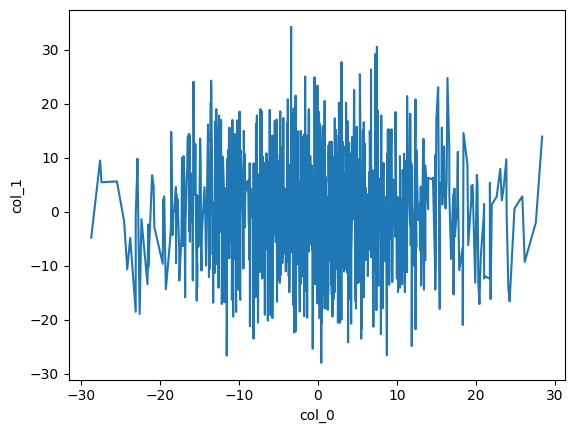

In [74]:
sns.lineplot(data=df, x="col_0", y="col_1")

<AxesSubplot: xlabel='col_0', ylabel='col_1'>

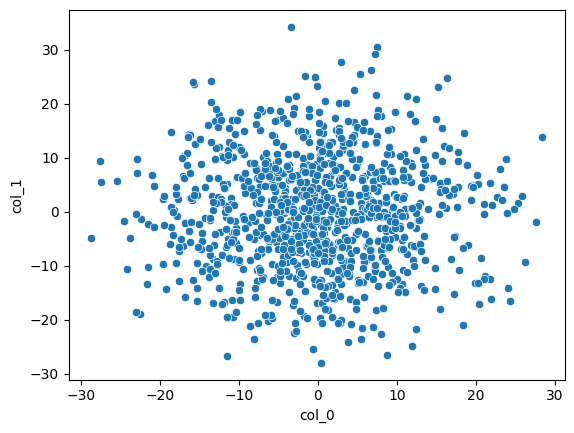

In [75]:
sns.scatterplot(data=df, x="col_0", y="col_1")

**Exercice**: Add a title to the plot.

Text(0.5, 1.0, 'This is a title')

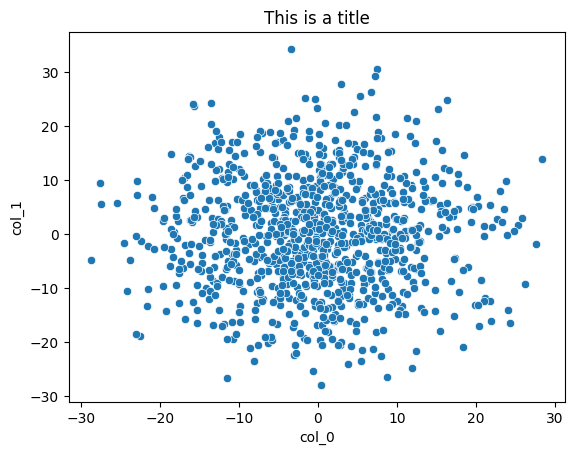

In [77]:
sns.scatterplot(data=df, x="col_0", y="col_1").set_title("This is a title")